Found 2352 images belonging to 2 classes.
Found 2381 images belonging to 2 classes.


C:\Users\cherisma\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 72s 901ms/step - accuracy: 0.9460 - loss: 1.0539 - val_accuracy: 0.4994 - val_loss: 37.0676 - learning_rate: 0.0010
Epoch 2/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 18s 249ms/step - accuracy: 0.9830 - loss: 0.6266 - val_accuracy: 0.4994 - val_loss: 47.2796 - learning_rate: 0.0010
Epoch 3/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 18s 249ms/step - accuracy: 0.9843 - loss: 0.5748 - val_accuracy: 0.4994 - val_loss: 56.1172 - learning_rate: 0.0010
Epoch 4/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 20s 264ms/step - accuracy: 0.9894 - loss: 0.5238 - val_accuracy: 0.4994 - val_loss: 48.7214 - learning_rate: 0.0010
Epoch 5/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 19s 259ms/step - accuracy: 0.9855 - loss: 0.4738 - val_accuracy: 0.4981 - val_loss: 43.8471 - learning_rate: 5.0000e-04
Epoch 6/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 18s 249ms/step - accuracy: 0.9928 - loss: 0.4356 - val_accuracy: 0.4973 - val_loss: 24.6089 - learning_rate: 5.0000e-04
Epoch 7/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 19s 259ms/step - accuracy: 0.9

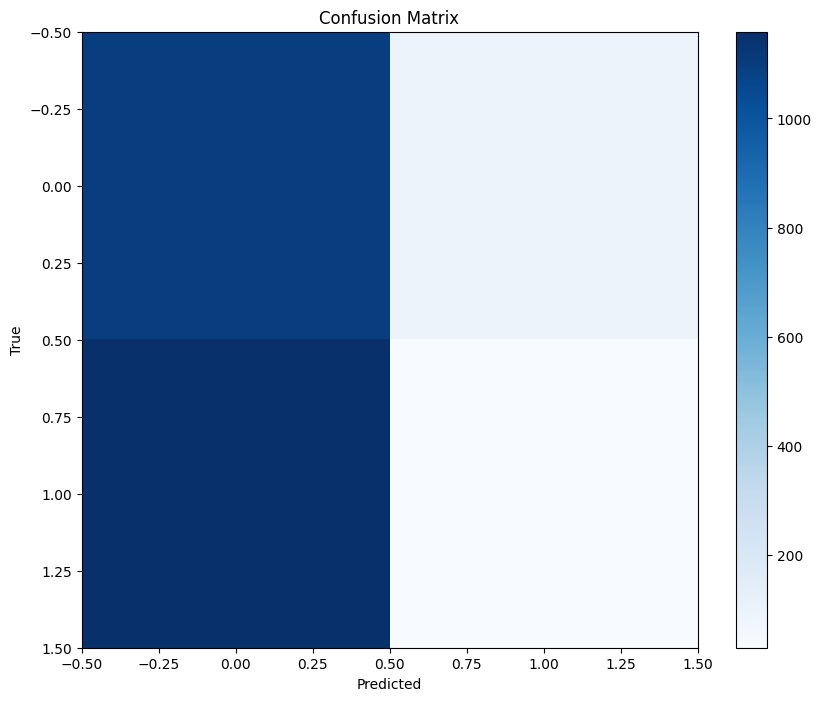

              precision    recall  f1-score   support

           1       0.49      0.92      0.64      1192
           2       0.24      0.03      0.05      1189

    accuracy                           0.47      2381
   macro avg       0.36      0.47      0.34      2381
weighted avg       0.36      0.47      0.34      2381

Macro F1 Score: 0.3409865026645054
Micro F1 Score: 0.47333053338933223
Weighted F1 Score: 0.34135860396926127
Macro Precision: 0.36312943262411346
Macro Recall: 0.4727666501092227


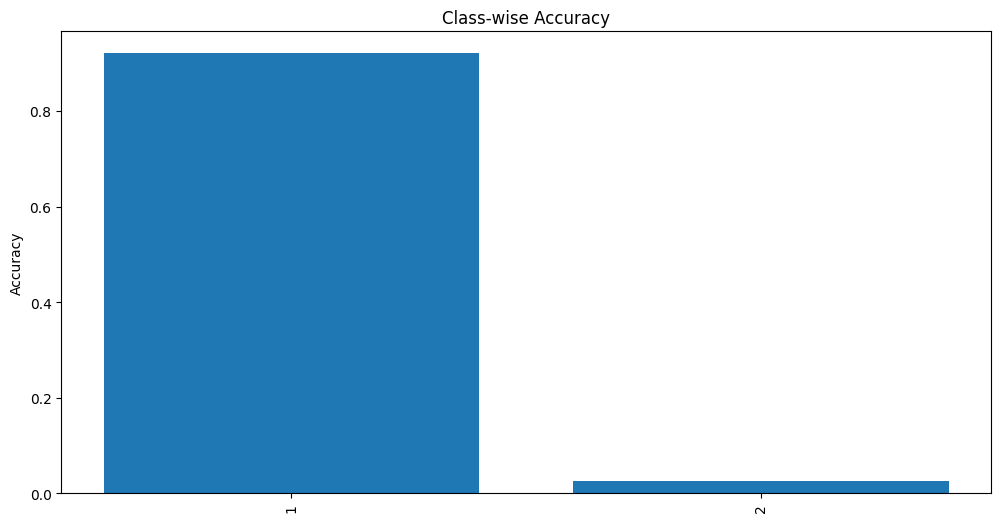

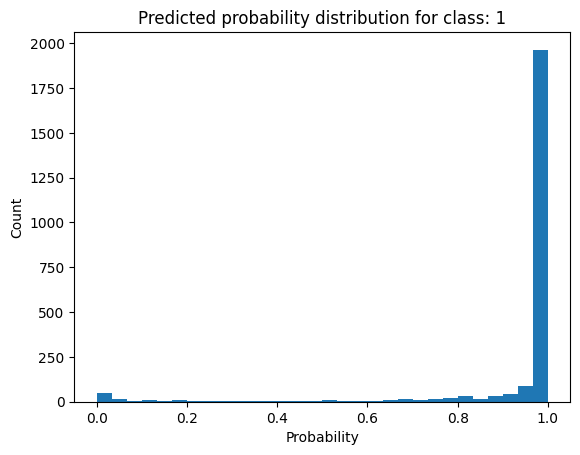

In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, f1_score, precision_score, recall_score, accuracy_score

# Settings
IMG_SIZE = (64, 64)
BATCH_SIZE = 32

# Data generators with augmentation for training and rescaling for validation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.15,
    height_shift_range=0.15,
    shear_range=0.15,
    zoom_range=0.15,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(rescale=1./255)

# Load training and validation data
train_gen = train_datagen.flow_from_directory(
    r"C:\Users\cherisma\OneDrive\Desktop\IIIT-HW-Telugu\TeluguSeg\train", 
    target_size=IMG_SIZE, 
    batch_size=BATCH_SIZE, 
    class_mode='categorical'
)

val_gen = val_datagen.flow_from_directory(
    r"C:\Users\cherisma\OneDrive\Desktop\IIIT-HW-Telugu\TeluguSeg\val", 
    target_size=IMG_SIZE, 
    batch_size=BATCH_SIZE, 
    class_mode='categorical',
    shuffle=False  # Important for evaluation metrics
)

# Build CNN model
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(*IMG_SIZE, 3), kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    BatchNormalization(),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    BatchNormalization(),
    MaxPooling2D(2,2),
    Conv2D(128, (3,3), activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    BatchNormalization(),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(256, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    Dropout(0.5),
    Dense(train_gen.num_classes, activation='softmax')
])

# Compile model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Callbacks
early_stop = EarlyStopping(monitor='val_loss', patience=7, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3)

# Train
history = model.fit(train_gen, validation_data=val_gen, epochs=50, callbacks=[early_stop, reduce_lr])

# Predict on validation set
val_gen.reset()  # Important to reset before prediction
Y_pred = model.predict(val_gen)
y_pred = np.argmax(Y_pred, axis=1)
y_true = val_gen.classes

# Confusion matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10,8))
plt.imshow(cm, cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.colorbar()
plt.show()

# Classification report (precision, recall, f1-score)
target_names = list(val_gen.class_indices.keys())
print(classification_report(y_true, y_pred, target_names=target_names))

# F1 scores
print("Macro F1 Score:", f1_score(y_true, y_pred, average='macro'))
print("Micro F1 Score:", f1_score(y_true, y_pred, average='micro'))
print("Weighted F1 Score:", f1_score(y_true, y_pred, average='weighted'))

# Precision & Recall
print("Macro Precision:", precision_score(y_true, y_pred, average='macro'))
print("Macro Recall:", recall_score(y_true, y_pred, average='macro'))

# Histogram: per-class accuracy
class_accuracies = []
for i in range(len(target_names)):
    idx = np.where(y_true == i)
    class_acc = accuracy_score(y_true[idx], y_pred[idx])
    class_accuracies.append(class_acc)

plt.figure(figsize=(12, 6))
plt.bar(target_names, class_accuracies)
plt.xticks(rotation=90)
plt.ylabel('Accuracy')
plt.title('Class-wise Accuracy')
plt.show()

# Histogram: predicted probabilities for the first class as example
plt.hist(Y_pred[:, 0], bins=30)
plt.title(f'Predicted probability distribution for class: {target_names[0]}')
plt.xlabel('Probability')
plt.ylabel('Count')
plt.show()
